In [3]:
%load_ext autoreload
%autoreload 2

from lkf_tools.detection import *
from lkf_tools.rgps import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
test = read_RGPS('../data/RGPS/2005363_2006001.DIV')

In [11]:
rfile = open('../data/RGPS/2005363_2006001.DIV','r',encoding= 'unicode_escape')

In [15]:
test

(array([[1.e+10, 1.e+10, 1.e+10, ..., 1.e+20, 1.e+20, 1.e+20],
        [1.e+10, 1.e+10, 1.e+10, ..., 1.e+20, 1.e+20, 1.e+20],
        [1.e+10, 1.e+10, 1.e+10, ..., 1.e+20, 1.e+20, 1.e+20],
        ...,
        [1.e+20, 1.e+20, 1.e+20, ..., 1.e+10, 1.e+10, 1.e+10],
        [1.e+20, 1.e+20, 1.e+20, ..., 1.e+10, 1.e+10, 1.e+10],
        [1.e+20, 1.e+20, 1.e+20, ..., 1.e+10, 1.e+10, 1.e+10]],
       dtype=float32),
 -2300.0,
 1000.0,
 -1000.0,
 2100.0,
 264,
 248)

In [16]:
lon,lat = get_latlon_RGPS(test[1],test[2],test[3],test[4],test[5],test[6])

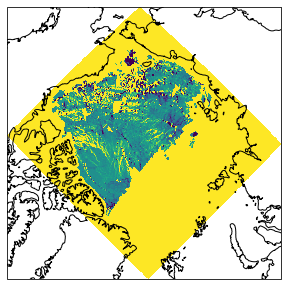

In [24]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig = plt.figure(figsize=[10, 5])

ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))

ax.coastlines(zorder=3)

ax.pcolormesh(lon,lat,test[0],vmin=-1e-2,vmax=1e-2,transform=ccrs.PlateCarree())

In [25]:
import xarray as xr

data = xr.open_dataset('/Users/nhutter/Documents/Research/sirex/data/McGill/McGill_runno01_expno07_1997_daily_means.nc')

In [1]:
%load_ext autoreload
%autoreload 2

from lkf_tools.dataset import *

In [2]:
test = process_dataset('/Users/nhutter/Documents/Research/sirex/data/McGill/McGill_runno01_expno07_1997_daily_means.nc',output_path='../data/lkfs/')

In [3]:
test.detect_lkfs(indexes=[28])

Compute deformation rates and detect features for day 29
Start detection routines


/Users/nhutter/Documents/Research/lkf_tools/lkf_tools/detection.py:96: RuntimeWarning: invalid value encountered in true_divide
  gaussian_field = field_nonnan_f/mask_nan_f
/Users/nhutter/Documents/Research/lkf_tools/lkf_tools/detection.py:1143: RuntimeWarning: Mean of empty slice
  eps_tot = np.nanmean(np.stack(eps_tot),axis=0)
/Users/nhutter/Documents/Research/lkf_tools/lkf_tools/detection.py:243: RuntimeWarning: invalid value encountered in true_divide
  dx = (seg_active[:,:,-1]-seg_active[np.arange(seg_active.shape[0]),:,-num_points])/np.stack([num_points-1,num_points-1],axis=1) - (seg_append-seg_active[:,:,-1])
/Users/nhutter/Documents/Research/lkf_tools/lkf_tools/detection.py:561: RuntimeWarning: invalid value encountered in arccos
  angle = np.arccos(angle)/np.pi*180
/Users/nhutter/Documents/Research/lkf_tools/lkf_tools/detection.py:554: RuntimeWarning: invalid value encountered in true_divide
  e1 = (e1/np.sqrt(np.sum(e1**2))) # Normalize basis vector
/Users/nhutter/Documents/R

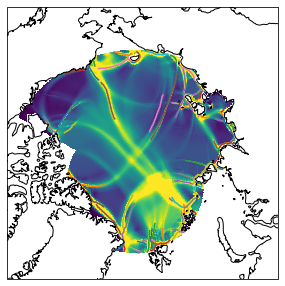

In [4]:
#%matplotlib widget

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig = plt.figure(figsize=[10, 5])

ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))

ax.coastlines(zorder=3)

ax.pcolormesh(test.lon[max([0,test.index_y[0][0]-1]):test.index_y[0][-1]+2:test.red_fac,
                       max([0,test.index_x[0][0]-1]):test.index_x[0][-1]+2:test.red_fac],
              test.lat[max([0,test.index_y[0][0]-1]):test.index_y[0][-1]+2:test.red_fac,
                       max([0,test.index_x[0][0]-1]):test.index_x[0][-1]+2:test.red_fac],
              np.sum(test.eps_tot_list,axis=0),transform=ccrs.PlateCarree(),vmin=0,vmax=1e-1)

lkfs = np.load(test.lkfpath.joinpath('lkf_McGill_runno01_expno07_1997_daily_means_029.npy'),allow_pickle=True)

for ilkf in lkfs:
    if np.min(ilkf[:,2])<-150 and np.max(ilkf[:,2]>150):
        ilkf[ilkf[:,2]<0,2]+=360
    ax.plot(ilkf[:,2],ilkf[:,3],transform=ccrs.PlateCarree())

In [12]:
test.track_lkfs(indexes=[0])

Track features in lkf_McGill_runno01_expno07_1997_daily_means_001.npy to lkf_McGill_runno01_expno07_1997_daily_means_002.npy


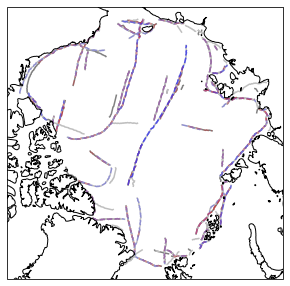

In [23]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig = plt.figure(figsize=[10, 5])

ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))

ax.coastlines(zorder=3)

it = 1

lkfs0 = np.load(test.lkfpath.joinpath('lkf_McGill_runno01_expno07_1997_daily_means_%03i.npy' %it),allow_pickle=True)
lkfs1 = np.load(test.lkfpath.joinpath('lkf_McGill_runno01_expno07_1997_daily_means_%03i.npy' %(it+1)),allow_pickle=True)

tracks = np.load(test.track_output_path.joinpath('lkf_tracked_pairs_McGill_runno01_expno07_1997_daily_means_%03i_to_McGill_runno01_expno07_1997_daily_means_%03i.npy' %(it,it+1)),allow_pickle=True)

for ilkf in lkfs0:
    if np.min(ilkf[:,2])<-150 and np.max(ilkf[:,2]>150):
        ilkf[ilkf[:,2]<0,2]+=360
    ax.plot(ilkf[:,2],ilkf[:,3],'0.5',transform=ccrs.PlateCarree())
    
for ilkf in lkfs1:
    if np.min(ilkf[:,2])<-150 and np.max(ilkf[:,2]>150):
        ilkf[ilkf[:,2]<0,2]+=360
    ax.plot(ilkf[:,2],ilkf[:,3],'0.75',transform=ccrs.PlateCarree())

for itrack in tracks:
    ax.plot(lkfs0[itrack[0]][:,2],lkfs0[itrack[0]][:,3],'r--',alpha=0.25,transform=ccrs.PlateCarree())
    ax.plot(lkfs1[itrack[1]][:,2],lkfs1[itrack[1]][:,3],'b--',alpha=0.25,transform=ccrs.PlateCarree())